In [4]:
#2 data cleaning 
#2 EDA (Exploratory data analysis)
#3 Text preprossing 
#4 model bulding
#5 improvment
#6 create application

In [ ]:
import numpy as np 
import pandas as pd
import nltk
from nltk.corpus import stopwords                  
from nltk.stem import PorterStemmer 
import string
import seaborn as sns

In [2]:
df = pd.read_csv('../dataset/spam.csv', encoding='ISO-8859-1')
df = df.loc[:, ['v1', 'v2']]

In [3]:
df.rename(columns={'v1':'target','v2':'text'},inplace = True)
df.sample(5)


,target,text
4840,ham,"Hmmm.... Mayb can try e shoppin area one, but ..."
4943,ham,Wrong phone! This phone! I answer this one but...
2283,ham,I reach home safe n sound liao...
1906,ham,And stop being an old man. You get to build sn...
900,ham,Probably money worries. Things are coming due ...


In [4]:
#preeprossing on csv
from sklearn.preprocessing import LabelEncoder 
encoder  = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])


In [5]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [6]:
df = df.drop_duplicates(keep = 'first')


In [7]:
#EDA
df.duplicated().sum()

0

In [8]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

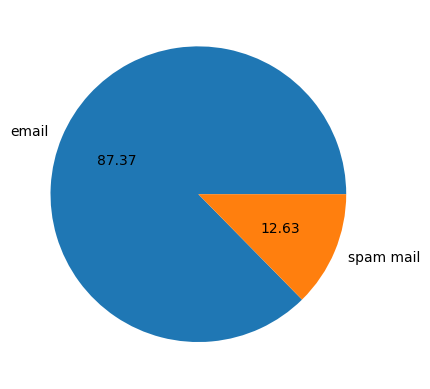

In [9]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(), labels=['email','spam mail'], autopct="%0.2f")
plt.show()

In [10]:
df['characters_count']=df['text'].apply(len)

In [11]:
df['word_count']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [12]:
df['sentence_count'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [13]:
    df[df['target'] == 0][['characters_count', 'word_count', 'sentence_count']].describe()

,characters_count,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [14]:
  df[df['target'] == 1][['characters_count', 'word_count', 'sentence_count']].describe()

,characters_count,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='characters_count', ylabel='Count'>

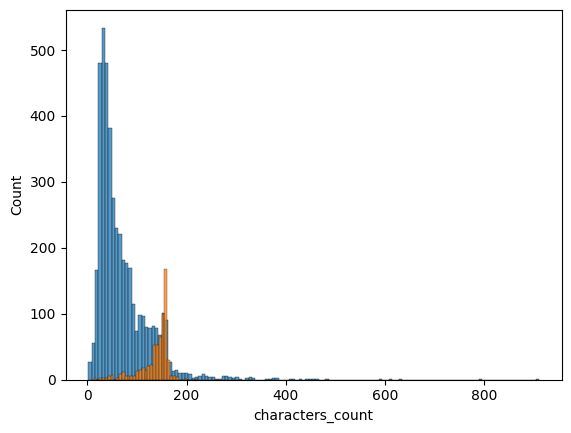

In [15]:
sns.histplot(df[df['target'] == 0 ]['characters_count'])
sns.histplot(df[df['target'] == 1 ]['characters_count'])

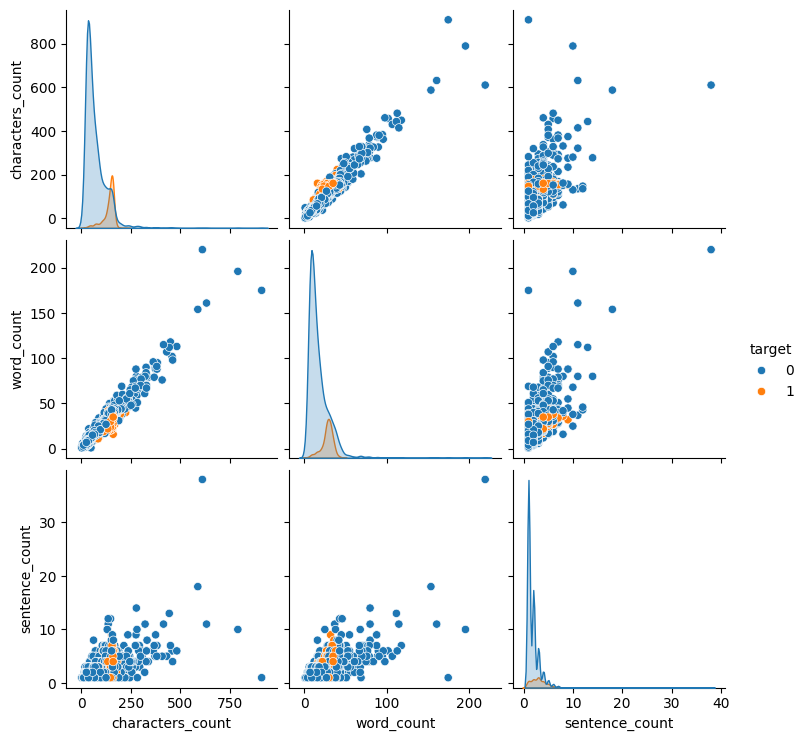

In [16]:
sns.pairplot(df, hue='target')


<Axes: >

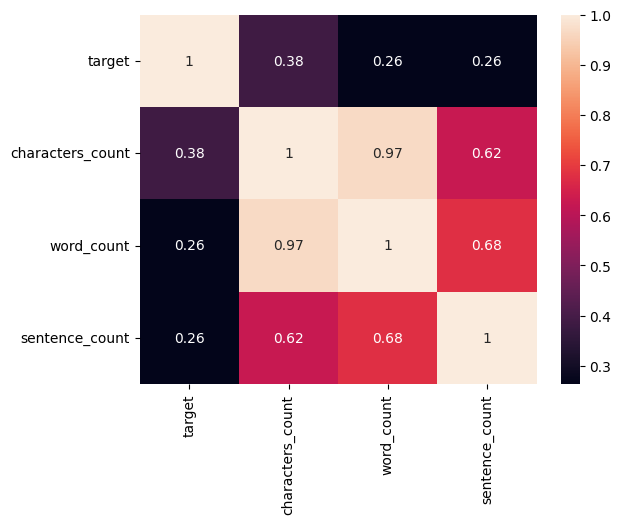

In [17]:

numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True)

In [18]:
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
     if i.isalnum():
        y.append(i)
    text = y[:]
    y.clear()

    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " " .join(y)

In [19]:

df['transform_text'] = df['text'].apply(transform_text)

df.head()

,target,text,characters_count,word_count,sentence_count,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [20]:

from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [21]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))

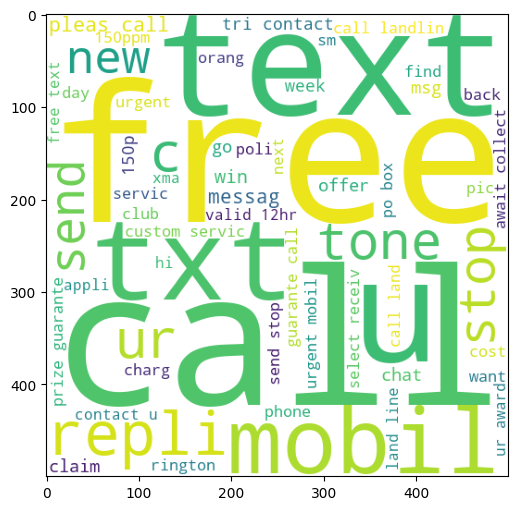

In [22]:

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)


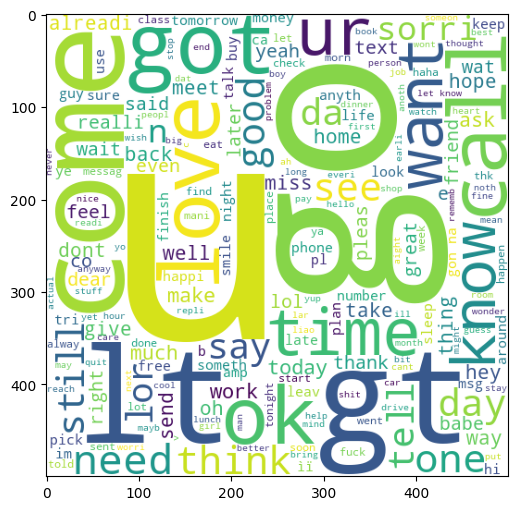

In [23]:
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)


In [24]:
spam_corpus = []
for msg in df[df['target']==1] ['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min'),
  Text(30, 0, 'custom'),
  Tex

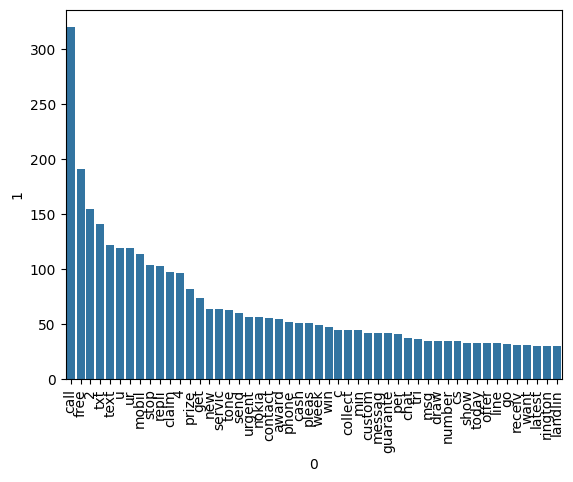

In [25]:

from collections import Counter
most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(50))
sns.barplot(x=most_common_words[0], y=most_common_words[1])
plt.xticks(rotation='vertical')

In [26]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()

In [27]:
tfidf = TfidfVectorizer(max_features=2000)

In [30]:

#scalng some time good for get predize data some time not good
#from sklearn.preprocessing import MinMaxScaler
#x = scaler.fit_transform(x)


In [28]:
x = tfidf.fit_transform(df['transform_text']).toarray()

In [61]:
#appandind the ncharacters_count to x
#x = np.hstack((x,df['characters_count'].values.reshape(-1,1)))


In [29]:
x.shape

(5169, 2000)

In [30]:
y = df['target'].values

In [31]:
from sklearn.model_selection import train_test_split

In [32]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [33]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB 
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [34]:

mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.97678916827853
[[896   0]
 [ 24 114]]
1.0


In [35]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.851063829787234
[[765 131]
 [ 23 115]]
0.46747967479674796


In [36]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

import pickle

0.9864603481624759
[[895   1]
 [ 13 125]]
0.9920634920634921
